## Principal Component Analysis

In [1]:
#importing the required libraries
#we will implement PCA from basic python, not from any other library
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)
#for plotting the figures with default figsize and style of ggplot

In [3]:
# data URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
#PCA uses for the dimensional reduction,linear dimensionality reduction
#projects dataset to another sub space of vectors

#Reading the data
iris=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                header=None)
iris.head()
#to see the first five entry of data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.columns=["sepal_length","sepal_width","petal_length","petal_width","species"]
#to change the name of the columns
iris.dropna(how='all',inplace=True)
#dropping all the null entry from the dataset
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#to check the info about data
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


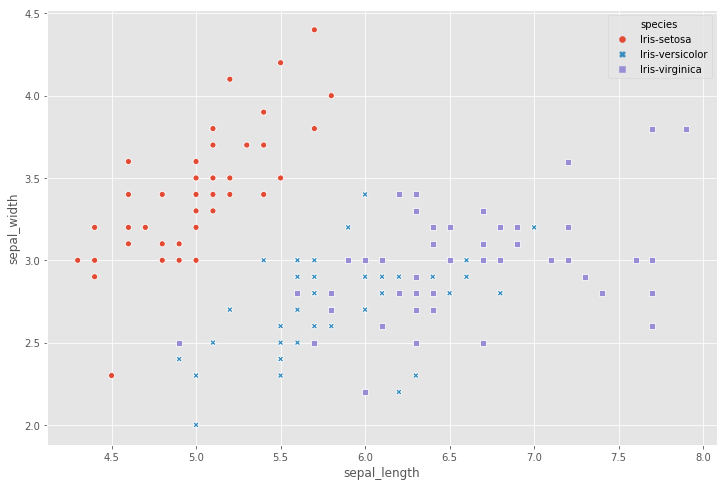

In [6]:
#visualizing the data
sns.scatterplot(x=iris.sepal_length,y=iris.sepal_width,
               hue=iris.species,style=iris.species)
#style attribute will tell the legends and hue will tell the distribution color according to the various species

In [8]:
#preprocessing the data ,i.e is standardizing the data
#zero out the mean from the each feature or normalize the features
X=iris.iloc[:,0:4].values
y=iris.species.values
#making the feature matrix and labels vector

In [9]:
from sklearn.preprocessing import StandardScaler

#standardizing the feature matrix by making every feature has zero mean and unit variance
X=StandardScaler().fit_transform(X)

Covariance: $\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}(x_{ij}-\bar{x_j})(x_{ik}-\bar{x_k})$

Coviance matrix: $sigma = \frac{1}{n-1}((X-\bar{x})^T(X-\bar{x}))$

In [11]:
#pca can be done using eigen decomposition, is to find the new coordination system of the new eigen values using rotation
#covariance matrix calculation
covariance_matrix=np.cov(X.T)
print("Covariance matrix: \n",covariance_matrix)

Covariance matrix: 
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


We can prove this by looking at the covariance matrix. It has the property that it is symmetric. We also constrain the each of the columns (eigenvectors) such that the values sum to one. Thus, they are orthonormal to each other.

Eigendecomposition of the covriance matrix:  $sigma = W\wedge W^{-1}$

In [13]:
#decompostion of covariance matrix to eigen values and vectors
eigen_values,eigen_vectors=np.linalg.eig(covariance_matrix)
print("Eigon vectors: \n",eigen_vectors,"\n")
print("Eigen values: \n",eigen_values)

Eigon vectors: 
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]] 

Eigen values: 
 [2.93035378 0.92740362 0.14834223 0.02074601]


In [14]:
#SVD(Singular Value Decomposition) can also be applied on no square matrix
eigen_vec_svd,s,v=np.linalg.svd(X.T)
eigen_vec_svd

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

In [15]:
#picking of principal components
#sort the eigen_values in descending order
for val in eigen_values:
    print(val)

2.9303537755893174
0.9274036215173421
0.14834222648163944
0.020746013995595943


In [16]:
#caclulate the variance explained by each of the above values
variance_explanied=[(i/sum(eigen_values))*100 for i in eigen_values]
variance_explanied

[72.77045209380134, 23.03052326768065, 3.6838319576273775, 0.5151926808906323]

In [18]:
#selecting the first two features
cumulative_variance_Explained=np.cumsum(variance_explanied)
cumulative_variance_Explained
#so if we use first two we will be able to capture 95% of the data

array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

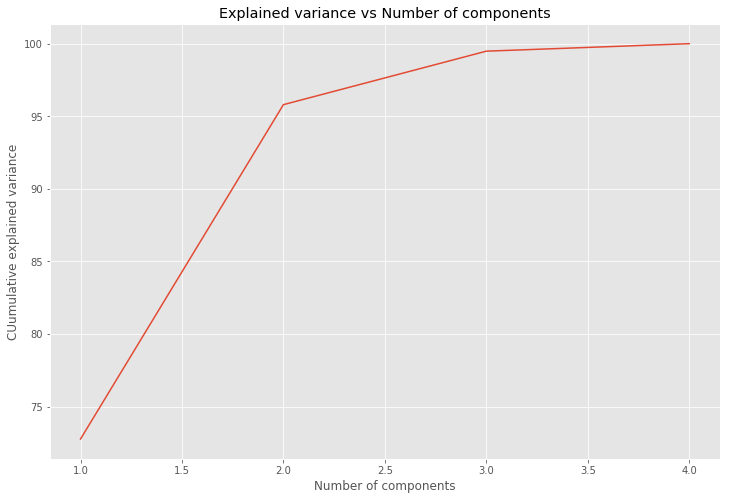

In [19]:
#plotting the relation
sns.lineplot(x=[1,2,3,4],y=cumulative_variance_Explained)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained variance vs Number of components")
plt.show()

In [20]:
eigen_vectors

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [21]:
#we will select the first two components
projection_matrix=(eigen_vectors.T[:][:])[:2].T
#first two vertical columns we will select so first we will transpose it then select first two rows then again transpose the first two row vectors
print("Projection matrix: \n",projection_matrix)

Projection matrix: 
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [22]:
#applying the pca to the original data
X_pca=X.dot(projection_matrix)

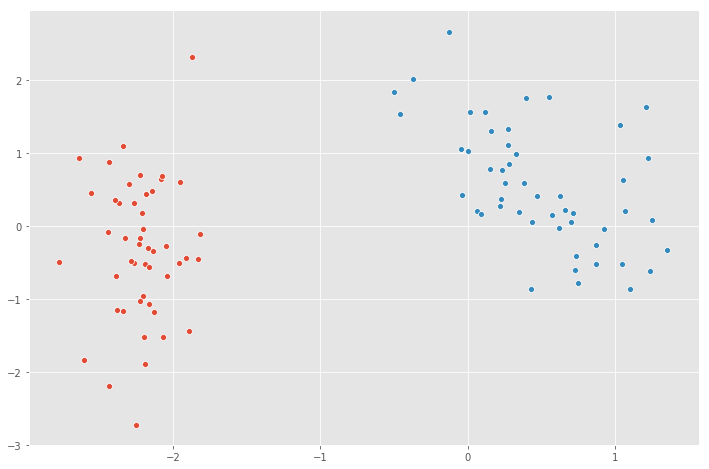

In [23]:
#plotting the transformed dataset
for species in ('Iris-setosa','Iris-versicolor','Iris-vergina'):
    sns.scatterplot(X_pca[y==species,0],
                   X_pca[y==species,1])
#better class separabality